<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

from nomeroff_net.pipes.number_plate_localizators.yolo_v8_detector import Detector

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              number_plate_localization_detector=Detector,
                                              image_loader="opencv")

/home/dimabendera/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and may be removed in the future. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/dimabendera/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dimabendera/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/dimabendera/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights

In [3]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example2.jpeg'),
])

Ultralytics YOLOv8.0.30 🚀 Python-3.10.6 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 with Max-Q Design, 8111MiB)


1
(920, 1227, 3)
uint8


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:125: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))
/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:239: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230

1
(530, 1340, 3)
uint8


/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/pipes/number_plate_text_readers/text_detector.py:87: UserWarning: Label 'md' not in dict_keys(['eu_ua_2015', 'eu_ua_2004', 'eu_ua_1995', 'eu', 'xx_transit', 'xx_unknown', 'ru', 'eu_ua_ordlo_lpr', 'eu_ua_ordlo_dpr', 'kz', 'kg', 'ge', 'su', 'am', 'by'])! Label changed on default 'eu_ua_2015'.
  warnings.warn(f"Label '{label}' not in {self.detectors_map.keys()}! "


In [7]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['AC4921CB']


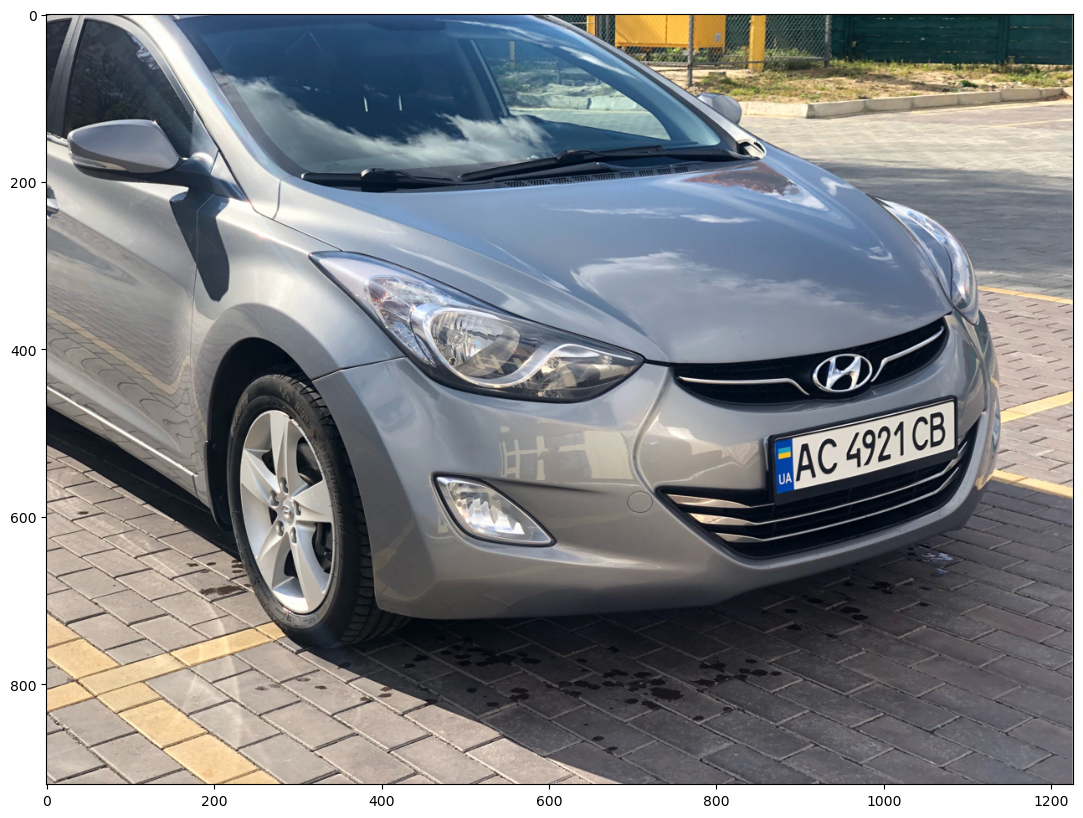

['RP70012', 'AB755OB']


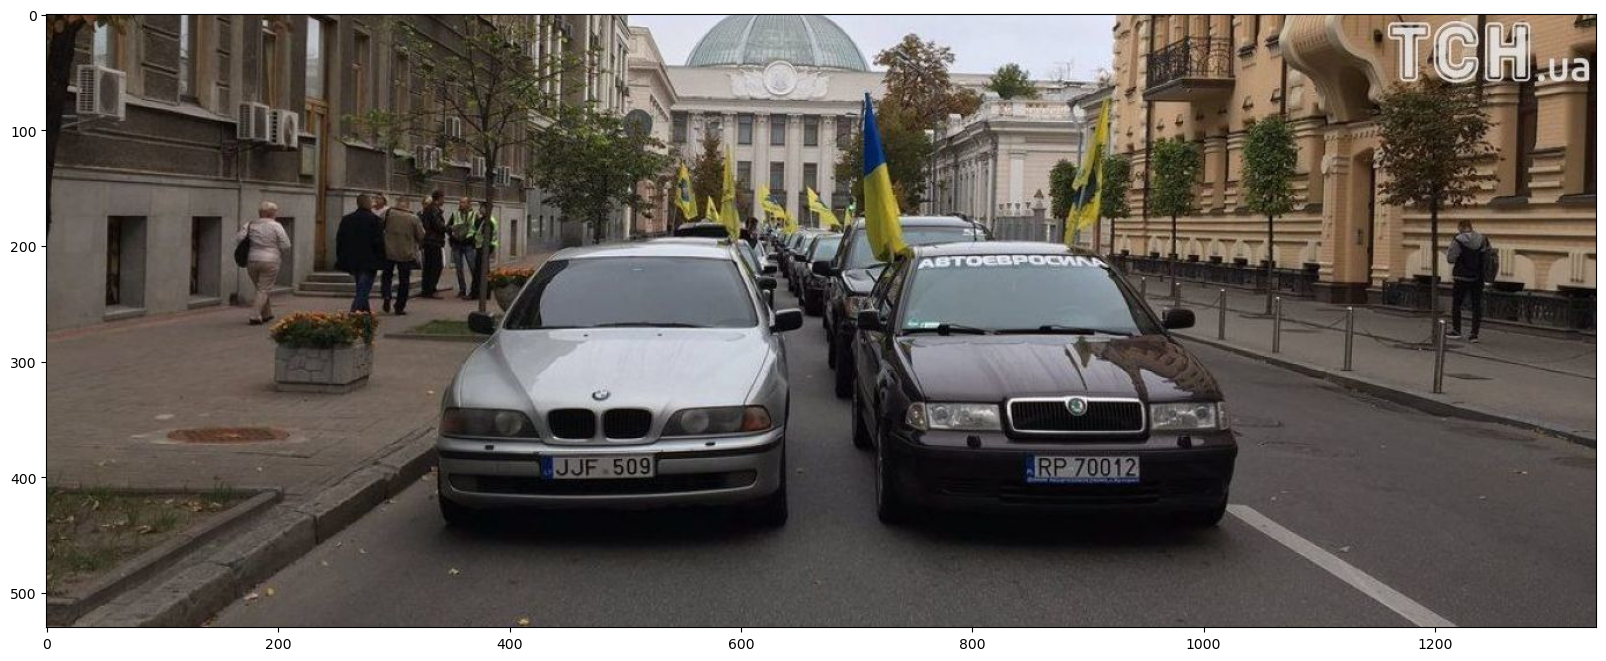

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, text in zip(images, texts):
    print(text)
    plt.imshow(img)
    plt.show()